In [ ]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.patches as patches
import seaborn as sns

import requests
from bs4 import BeautifulSoup
import json

from io import BytesIO
from PIL import Image
from highlight_text import htext
from mplsoccer.pitch import Pitch

text_color = '#131313'
background_color = "#ffffff"
main_color = '#010101'
scatter_color = '#D7B013'
secondary_color = '#C0C0C0'
home_color = '#2ec4b6'
away_color = '#ff9f1c'

mpl.rcParams['xtick.color'] = text_color
mpl.rcParams['ytick.color'] = text_color

In [18]:
base_url = 'https://understat.com/match/'
match = str(input('Please enter the match id: '))
url = base_url +match

res = requests.get(url)
soup = BeautifulSoup(res.content, "lxml")
scripts = soup.find_all('script')
strings = scripts[1].string
index_start = strings.index("('") + 2
index_end = strings.index("')")
json_data = strings[index_start:index_end]
json_data = json_data.encode('utf8').decode('unicode_escape')
data = json.loads(json_data)

x_under = []
y_under = []
min_under = []
result_under = []
xG_under = []
player_under = []
team_under = []
home_data = data['h']
away_data = data['a']
names = ['x', 'y', 'minute', 'team', 'xG', 'player', 'result']

for index in range(len(home_data)):
    for key in home_data[index]:
        if key == 'X':
            x_under.append(home_data[index][key])
        if key == 'Y':
            y_under.append(home_data[index][key])
        if key == 'minute':
            min_under.append(home_data[index][key])
        if key == 'h_team':
            team_under.append(home_data[index][key])
        if key == 'xG':
            xG_under.append(home_data[index][key])
        if key == 'player':
            player_under.append(home_data[index][key])
        if key == 'result':
            result_under.append(home_data[index][key])

for index in range(len(away_data)):
    for key in away_data[index]:
        if key == 'X':
            x_under.append(1 - float(away_data[index][key]))
        if key == 'Y':
            y_under.append(1 - float(away_data[index][key]))
        if key == 'minute':
            min_under.append(away_data[index][key])
        if key == 'a_team':
            team_under.append(away_data[index][key])
        if key == 'xG':
            xG_under.append(away_data[index][key])
        if key == 'player':
            player_under.append(away_data[index][key])
        if key == 'result':
            result_under.append(away_data[index][key])

df2 = pd.DataFrame([x_under,
                    y_under,
                    min_under,
                    team_under,
                    xG_under,
                    player_under,
                    result_under],
                   index=names)
df2 = df2.T

df2['x'] = pd.to_numeric(df2['x'])
df2['y'] = pd.to_numeric(df2['y'])
df2['xG'] = pd.to_numeric(df2['xG'])
df2['minute'] = pd.to_numeric(df2['minute'])

df2['x'] = df2['x'] * 100
df2['y'] = df2['y'] * 100

df2['xx'] = df2['y']
df2['yy'] = df2['x']

df2['x'] = df2['xx']
df2['y'] = df2['yy']

df2['x'] = df2['x'] * .8
df2['y'] = df2['y'] * 1.2

home_team = df2['team'].iloc[0]
away_team = df2['team'].iloc[-1]


def plotShotMap():

    for x in range(len(df2['x'])):
        if df2['team'][x] == home_team:
            if df2['result'][x] == 'Goal':
                axes.scatter(
                    df2['y'][x],
                    df2['x'][x],
                    color=home_color,
                    s=df2['xG'][x] * 1500,
                    edgecolor=home_color,
                    linewidth=2,
                    alpha=1)
            else:
                axes.scatter(
                    df2['y'][x],
                    df2['x'][x],
                    color='red',
                    s=df2['xG'][x] * 1500,
                    edgecolor=home_color,
                    facecolor=background_color,
                    hatch=5 * '/',
                    marker='o',
                    alpha=.8)

        if df2['team'][x] == away_team:
            if df2['result'][x] == 'Goal':
                axes.scatter(
                    df2['y'][x],
                    df2['x'][x],
                    color=away_color,
                    s=df2['xG'][x] * 1500,
                    edgecolor=away_color,
                    linewidth=2,
                    alpha=1)
            else:
                axes.scatter(
                    df2['y'][x],
                    df2['x'][x],
                    color='blue',
                    s=df2['xG'][x] * 1500,
                    edgecolor=away_color,
                    facecolor=background_color,
                    hatch=5 * '/',
                    marker='o',
                    alpha=.8)

    axes.annotate(
        f'{home_team}', xy=(
            80, 8), xytext=(
            73, 8), color='red', fontsize=38, alpha=0.2)
    axes.annotate(
        f'{away_team}', xy=(
            5, 70), xytext=(
            4, 70), color='blue', fontsize=38, alpha=0.2)






Please enter the match id:  14805


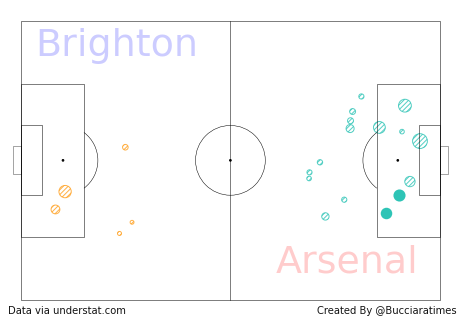

In [31]:
fig, axes = plt.subplots(1, figsize=(8,8))
fig.set_facecolor(background_color)
pitch = Pitch(
    pitch_type='statsbomb',
    orientation='horizontal',
    goal_type='box',
    pitch_color=background_color,
    line_color=main_color,
    figsize=(13.5, 8),
    constrained_layout=False,
    tight_layout=False,
    line_zorder=1, linewidth=0.5
    
)
pitch.draw(ax=axes)
axes.invert_yaxis()

# Add signature and data source
axes.text(30, -4, s='Data via understat.com', ha='right',
        fontsize=10, fontstyle='normal', color=text_color)
axes.text(125, -4, s='Created By @Bucciaratimes', fontsize=10, fontstyle='normal', color=text_color, ha='right')

plotShotMap()
# plt.savefig(f'/work/output/report/xgchart.png', bbox_inches='tight', transparent=True, dpi=500, facecolor='#131313')


In [3]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.patches as patches
import seaborn as sns

import requests
from bs4 import BeautifulSoup
import json

from io import BytesIO
from PIL import Image
from highlight_text import htext
from mplsoccer.pitch import Pitch

# from utils.metadata import *


text_color = '#131313'
background_color = "#ffffff"
main_color = '#010101'
scatter_color = '#D7B013'
secondary_color = '#C0C0C0'

mpl.rcParams['xtick.color'] = text_color
mpl.rcParams['ytick.color'] = text_color

def plotShotMap(df,axes,home_team,away_team):
    
#     sns.relplot(x="x", y="y",size="xG",
#             sizes=(20, 800), alpha=.7, palette="nipy_spectral",
#             height=7, aspect=1.5, data=df2)

    for x in range(len(df['x'])):
        if df['team'][x] == home_team:
            if df['result'][x] == 'Goal':
                axes.scatter(
                    df['y'][x],
                    df['x'][x],
                    color=home_color,
                    s=df['xG'][x] * 1500,
                    edgecolor=home_color,
                    linewidth=2,
                    alpha=1)
            else:
                axes.scatter(
                    df['y'][x],
                    df['x'][x],
                    color='red',
                    s=df['xG'][x] * 1500,
                    edgecolor=home_color,
                    facecolor=background_color,
                    hatch=5 * '/',
                    marker='o',
                    alpha=.8)

        if df['team'][x] == away_team:
            if df['result'][x] == 'Goal':
                axes.scatter(
                    df['y'][x],
                    df['x'][x],
                    color=away_color,
                    s=df['xG'][x] * 1500,
                    edgecolor=away_color,
                    linewidth=2,
                    alpha=1)
            else:
                axes.scatter(
                    df['y'][x],
                    df['x'][x],
                    color='blue',
                    s=df['xG'][x] * 1500,
                    edgecolor=away_color,
                    facecolor=background_color,
                    hatch=5 * '/',
                    marker='o',
                    alpha=.8)


def main(ax,match=None):

    base_url = 'https://understat.com/match/'
    url = base_url + match

    res = requests.get(url)
    soup = BeautifulSoup(res.content, "lxml")
    scripts = soup.find_all('script')
    strings = scripts[1].string
    index_start = strings.index("('") + 2
    index_end = strings.index("')")
    json_data = strings[index_start:index_end]
    json_data = json_data.encode('utf8').decode('unicode_escape')
    data = json.loads(json_data)

    x_under = []
    y_under = []
    min_under = []
    result_under = []
    xG_under = []
    player_under = []
    team_under = []
    home_data = data['h']
    away_data = data['a']
    names = ['x', 'y', 'minute', 'team', 'xG', 'player', 'result']

    for index in range(len(home_data)):
        for key in home_data[index]:
            if key == 'X':
                x_under.append(home_data[index][key])
            if key == 'Y':
                y_under.append(home_data[index][key])
            if key == 'minute':
                min_under.append(home_data[index][key])
            if key == 'h_team':
                team_under.append(home_data[index][key])
            if key == 'xG':
                xG_under.append(home_data[index][key])
            if key == 'player':
                player_under.append(home_data[index][key])
            if key == 'result':
                result_under.append(home_data[index][key])

    for index in range(len(away_data)):
        for key in away_data[index]:
            if key == 'X':
                x_under.append(1 - float(away_data[index][key]))
            if key == 'Y':
                y_under.append(1 - float(away_data[index][key]))
            if key == 'minute':
                min_under.append(away_data[index][key])
            if key == 'a_team':
                team_under.append(away_data[index][key])
            if key == 'xG':
                xG_under.append(away_data[index][key])
            if key == 'player':
                player_under.append(away_data[index][key])
            if key == 'result':
                result_under.append(away_data[index][key])

    df = pd.DataFrame([x_under,
                        y_under,
                        min_under,
                        team_under,
                        xG_under,
                        player_under,
                        result_under],
                       index=names)
    df = df.T

    df['x'] = pd.to_numeric(df['x'])
    df['y'] = pd.to_numeric(df['y'])
    df['xG'] = pd.to_numeric(df['xG'])
    df['minute'] = pd.to_numeric(df['minute'])

    df['x'] = df['x'] * 100
    df['y'] = df['y'] * 100

    df['xx'] = df['y']
    df['yy'] = df['x']

    df['x'] = df['xx']
    df['y'] = df['yy']

    df['x'] = df['x'] * .8
    df['y'] = df['y'] * 1.2

    home_team = df['team'].iloc[0]
    away_team = df['team'].iloc[-1]
    
    plotShotMap(df,ax,home_team,away_team)



#     axes.annotate(
#         f'{home_team}', xy=(
#             80, 8), xytext=(
#             73, 8), color='red', fontsize=38, alpha=0.2)
#     axes.annotate(
#         f'{away_team}', xy=(
#             5, 70), xytext=(
#             4, 70), color='blue', fontsize=38, alpha=0.2)




